<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_2/Esperienza_2_Curva_VTC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo)

Valore teorico dell'amplificazione

#Tempo

In [7]:
#@title  dati e derivazioni
#v_in e v_out sono picco-picco

v_in = [0.182, 0.260, 0.384, 0.5, 0.596, 0.696, 0.792, 0.888, 1, 1.19, 1.39, 1.58, 1.78, 1.98, 2.48, 2.98, 3.46, 4.48, 5.96, 6.96, 7.92, 8.96, 10.9, 13.9, 16.8, 19.2, 20 ] #[V]
v_div_vin = [0.05, 0.50, 0.5, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,0.2, 0,2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 2, 2, 2,2,2,2,5,5,5]

v_out = [0.332, 0.46, 0.720, 0.928, 1.11, 1.30, 1.49, 1.68, 1.84, 2.2, 2.6, 2.96, 3.32, 3.68, 4.6, 5.52, 6.44, 8.32, 11, 12.9, 15, 16.8, 21, 26.2, 29.2, 29.2, 29.2] #[V]
v_div_vout = [0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 2, 2, 2,5,5,5,5,5,5,5]

#calcolo degli errori
err_v_out = []
for i in range(len(v_out)):
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_div_vout[i])**2 + ((3/100)*v_out[i])**2 )            #ipotesi uniforme
  err_v_out.append(dummy)

err_v_in = []
for i in range(len(v_in)):
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_div_vin[i])**2 + ((3/100)*v_in[i])**2 )              #ipotesi uniforme
  err_v_in.append(dummy)

print("Errore v_out")
print(err_v_out)
print("Errore v_in")
print(err_v_in)

Errore v_out
[0.006434324621382833, 0.009839376674024293, 0.013742391834514592, 0.019791122589012812, 0.02242684403417773, 0.025304808502206323, 0.028273014224403686, 0.04098845365872361, 0.04300015503848019, 0.04780516011199349, 0.053491432335780034, 0.058837176456160205, 0.06434324621382832, 0.06997180384507272, 0.0983937667402429, 0.1116890922755366, 0.1256002123140456, 0.18466199753423368, 0.22278539748675927, 0.251508117827901, 0.3883726732577014, 0.4098845365872361, 0.46436336347017443, 0.5378339272799116, 0.5823446860179401, 0.5823446860179401, 0.5823446860179401]
Errore v_in
[0.004274404441946659, 0.02921666191291081, 0.02962381024333861, 0.010408329997330665, 0.01182785413054005, 0.013366305897043254, 0.014883297125749165, 0.019232694385689524, 0.02081665999466133, 0.023625480594758982, 0.02407550622520739, 0.1186686703950682, 0.0329219278495858, 0.0448269264319263, 0.05175377602970949, 0.05913927065270025, 0.06651927039086743, 0.08279162598556289, 0.1182785413054005, 0.166930

Fit lineare (senza gli ultimi tre punti di saturazione)

In [8]:
#@title dati ed eleaborazione
#rimozione dei punti di saturazione
v_in_fit = [0.182, 0.260, 0.384, 0.5, 0.596, 0.696, 0.792, 0.888, 1, 1.19, 1.39, 1.58, 1.78, 1.98, 2.48, 2.98, 3.46, 4.48, 5.96, 6.96, 7.92, 8.96, 10.9, 13.9 ] #[V]
v_div_vin_fit = [0.05, 0.50, 0.5, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,0.2, 0,2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 2, 2, 2,2,2,2]
v_out_fit = [0.332, 0.46, 0.720, 0.928, 1.11, 1.30, 1.49, 1.68, 1.84, 2.2, 2.6, 2.96, 3.32, 3.68, 4.6, 5.52, 6.44, 8.32, 11, 12.9, 15, 16.8, 21, 26.2] #[V]
v_div_vout_fit = [0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 2, 2, 2,5,5,5,5]

#calcolo degli errori
err_v_out_fit = []
for i in range(len(v_out_fit)):
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_div_vout_fit[i])**2 + ((3/100)*v_out_fit[i])**2 )    #ipotesi uniforme
  err_v_out_fit.append(dummy)

In [9]:
regrlin_pear_errpost_xys(v_in_fit, v_out_fit, err_v_out_fit)

pendenza $b$	 1.8736887809668121
$\sigma_b$	 0.010334231834882354
intercetta $a$	 -0.011559525951846616
$\sigma_a$	 0.005847097550900272
Coefficiente di Pearson $\rho_{xy}$	 0.9998589861650913
$\sigma_{\rho_{xy}}$	 0.0035802982666241876
Errore a posteriori $\delta$	 0.14411822119633758


chi quadro 
 8.148433182490809
NDOF  
 22


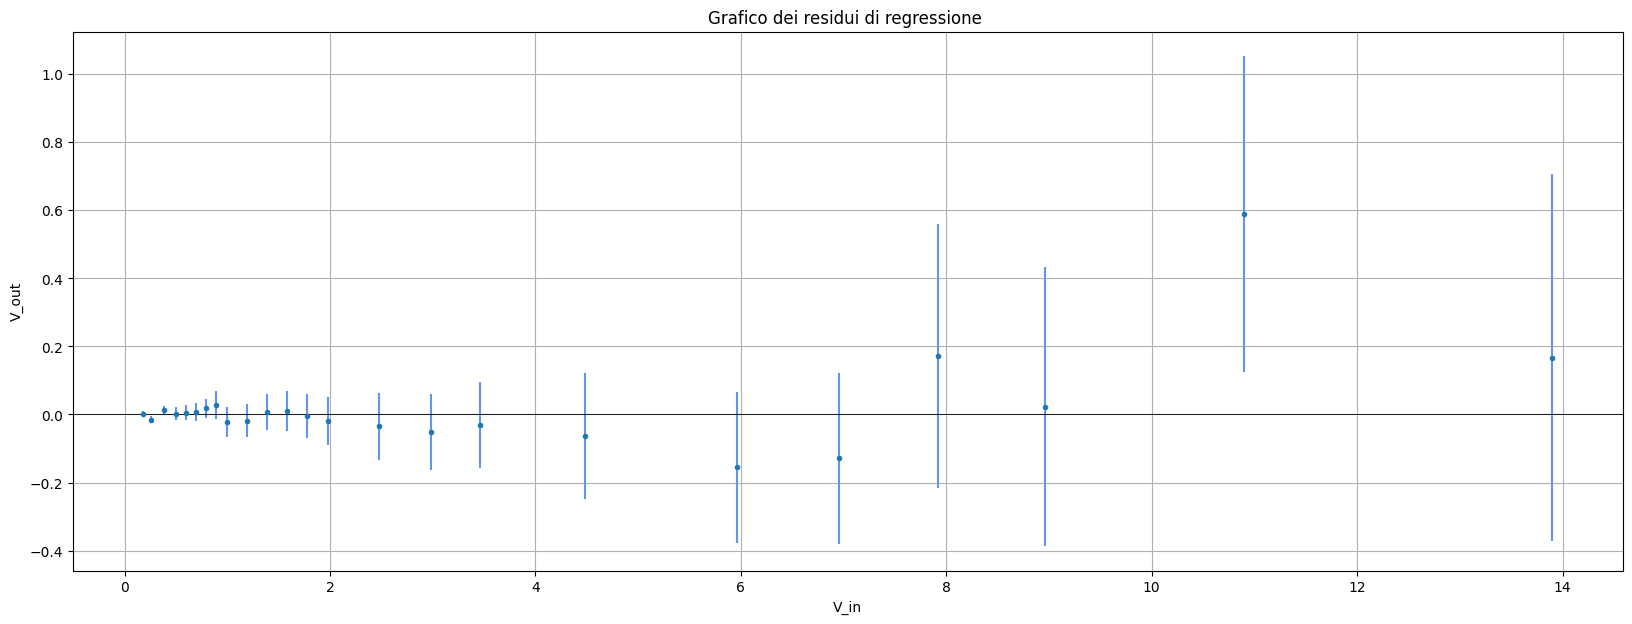

In [10]:
plt.figure(figsize=(20,7))
chi_quadro_lineare(v_out_fit, v_in_fit, err_v_out_fit, -0.011559525951846616, 1.8736887809668121, "V_out", "V_in","")

Grafico

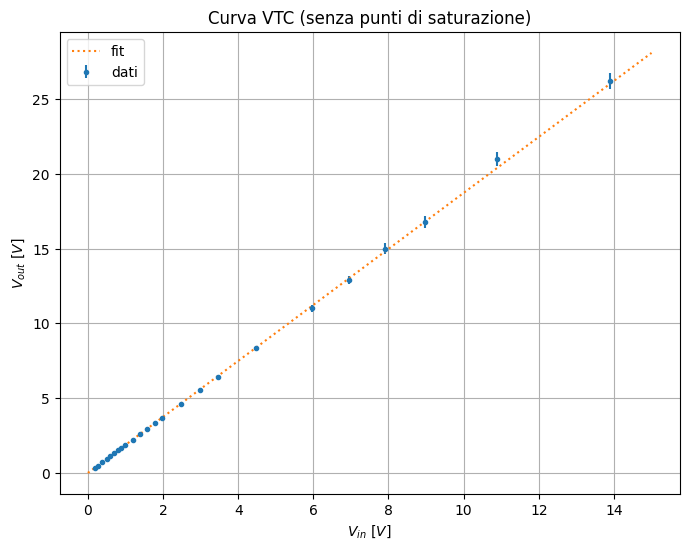

In [11]:
plt.figure(figsize=(8,6))
plt.errorbar(v_in_fit, v_out_fit, linestyle="", marker=".", yerr=err_v_out_fit, label="dati")
plt.grid()
plt.title("Curva VTC (senza punti di saturazione)")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0,15,80), retta_fit_xba(np.linspace(0,15,80), 1.8736887809668121, -0.011559525951846616), marker="", linestyle=":", label="fit")
plt.legend()

Grafico di tutti i punti

Text(0, 0.5, '$V_{out} \\ [V]$')

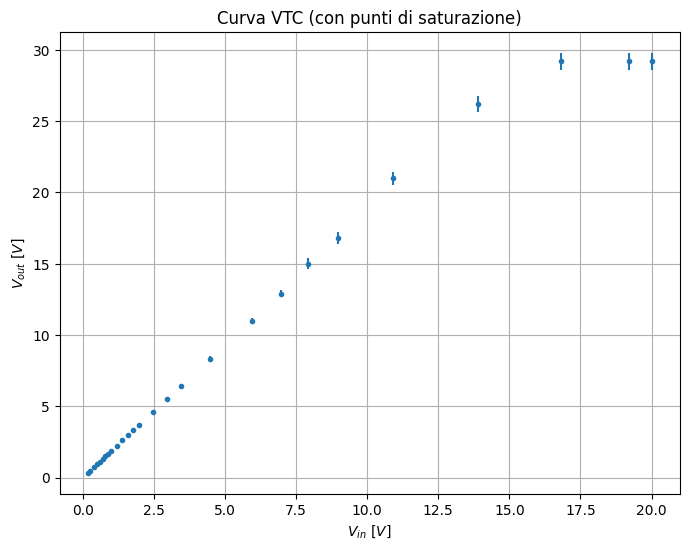

In [12]:
plt.figure(figsize=(8,6))
plt.errorbar(v_in, v_out, linestyle="", marker=".", yerr=err_v_out)
plt.grid()
plt.title("Curva VTC (con punti di saturazione)")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")

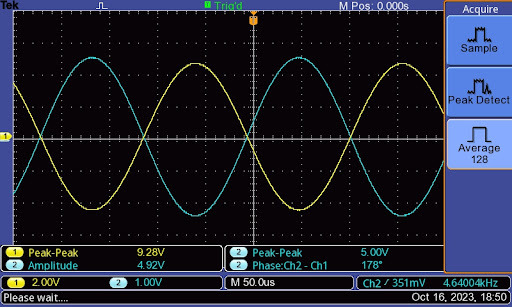

Compatibilità con il valore teorico

#Frequenza

In [20]:
#@title dati

frequenza = [0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215, 464, 1000, 2150, 4640  ]    #[kHz]
v_in = [5, 5, 5, 5, 5, 4.92, 4.92, 4.92, 4.96, 4.96, 4.96, 5.04, 5.08, 5.12, 5.16]                   #[V]
v_div_vin = [1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1 ]
v_out = [9.28, 9.28, 9.28, 9.28, 9.28, 9.12, 9.12, 9.12, 9.20, 9.20, 9.56, 9.28, 5.92, 2.42, 0.696]  #[V]
v_div_vout = [2, 2, 2, 2, 2, 2, 2, 2, 2,2,2,2,2,0.5, 0.1]

In [21]:
#@title elaborazione
A = []
for i in range(len(v_in)):
  dummy = 20*math.log10(v_out[i]/v_in[i])
  A.append(dummy)

print("ampiezza [db]")
print(A, "\n")

#calcolo degli errori
err_A = []
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt(1/3)* math.sqrt( ((1/10)*v_div_vout[i])**2 + ((3/100)*v_out[i])**2)    #ipotesi uniforme
  print("err_vout:", dummy_err_vout)
  dummy_err_vin = math.sqrt(1/3)* math.sqrt( ((1/10)*v_div_vin[i])**2 + ((3/100)*v_in[i])**2 )      #ipotesi uniforme
  print("err_vi:  ", dummy_err_vin)
  print("------------------------------")
  dummy_g = v_out[i]/v_in[i]
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )    #propagazione di una ipotesi uniforme
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(10)))
  err_A.append(dummy_err_A)
print("\nErrori ampiezza")
print(err_A)

ampiezza [db]
[5.371559437656864, 5.371559437656864, 5.371559437656864, 5.371559437656864, 5.371559437656864, 5.3605947112211165, 5.3605947112211165, 5.3605947112211165, 5.366123017107157, 5.366123017107157, 5.699524315718052, 5.3023487954667345, 1.3291598887800098, -6.50909189990799, -17.400809240332986] 

err_vout: 0.19791122589012816
err_vi:   0.10408329997330663
------------------------------
err_vout: 0.19791122589012816
err_vi:   0.10408329997330663
------------------------------
err_vout: 0.19791122589012816
err_vi:   0.10408329997330663
------------------------------
err_vout: 0.19791122589012816
err_vi:   0.10408329997330663
------------------------------
err_vout: 0.19791122589012816
err_vi:   0.10408329997330663
------------------------------
err_vout: 0.1956672004535592
err_vi:   0.10293324697751126
------------------------------
err_vout: 0.1956672004535592
err_vi:   0.10293324697751126
------------------------------
err_vout: 0.1956672004535592
err_vi:   0.102933246977511

In **prima approssimazione** possiamo trattare il nostro amplificatore come un circuito passa basso (osservare il grafico), procediamo a determinare la frequenza di taglio supreriore con il metodo delle rette:

proponiamo un fit lineare a due parametri sugli ultimi tre punti, e un fit lineare ad un parametro sui restanti

https://online.scuola.zanichelli.it/mirandola-files/Corso_Elettr_V02/Capitolo_04/Mirandola_V2_04-1_Parametri_amp_op.pdf

a quanto pare negli operazionali la larghezza di banca coincide con la frequenza di taglio superiore

In [39]:
#@title estrazione dei dati
frequenza_hz = []
for i in frequenza:
  dummy = i*1000
  frequenza_hz.append(dummy)

frequenza_hz_2p = frequenza_hz[-4:]
A_2p = A[-4:]
err_A_2p = err_A[-4:]

frequenza_hz_1p = frequenza_hz[:(len(frequenza_hz)-4)]
A_1p = A[:(len(A)-4)]
err_A_1p = err_A[:(len(err_A)-4)]



#plt.plot(frequenza_hz_2p, A_2p, linestyle="", marker="x")
#plt.xscale("log", base=10)

In [32]:
#@title fit e intersezione

regrlin_pear_errpost_xys(np.log10( frequenza_hz_2p ), A_2p, err_A_2p)

def retta_orizzontale(x, a):
  return a + (0*x)

print("-------------------------------------------------------------")
parametri_2p, matrixcov_2p = curve_fit(retta_fit_xba, np.log10( frequenza_hz_2p ), A_2p, sigma=err_A_2p)
print("parametri\n", parametri_2p)
print("err\n", (matrixcov_2p))
print("-------------------------------------------------------------")
parametri_1p, matrixcov_1p = curve_fit(retta_orizzontale, np.log10( frequenza_hz_1p ), A_1p, sigma=err_A_1p)
print("parametri\n", parametri_1p)
print("err\n", math.sqrt(matrixcov_1p))

#calcoliamo il punto di intersezione
#intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2)
intersezione_2rette(136.27290367, math.sqrt(385.56504354), -22.82197534 , math.sqrt(10.02296249 ), -62.0465119, 5.39774904, 0.030393941335799795, 0, 0, 0)

intersezione_2rette(5.39774904, 0.030393941335799795, 0, 0, 0, 136.27290367, math.sqrt(385.56504354), -22.82197534 , math.sqrt(10.02296249 ), -62.0465119  )

pendenza $b$	 -22.821975631501516
$\sigma_b$	 0.34039465659248286
intercetta $a$	 136.2729054867193
$\sigma_a$	 2.1112200557438996
Coefficiente di Pearson $\rho_{xy}$	 -0.9798953655556223
$\sigma_{\rho_{xy}}$	 0.1410763491209872
Errore a posteriori $\delta$	 2.452778479162883
-------------------------------------------------------------
parametri
 [-22.82197534 136.27290367]
err
 [[ 10.02296249 -62.0465119 ]
 [-62.0465119  385.56504354]]
-------------------------------------------------------------
parametri
 [5.39774904]
err
 0.030393941335799795
---------------------------------------------
x intersezione
5.734611166659861
incertezza
59.39274092654448
---------------------------------------------
---------------------------------------------
x intersezione
5.734611166659861
incertezza
61.90933791265491
---------------------------------------------


dato che abbiamo effettuato una regressione nella quale le x erano in scala logaritmica in base 10, l'intercetta che abbiamo trovato è l'esponente del logaritmo in base 10, l'interpretazione dell'incertezza mi risulta più complicata

In [33]:
print(10**(5.734611166659861), "   [Hz]")

542764.1652692795    [Hz]


chi quadro 
 1.511538647096953
NDOF  
 9


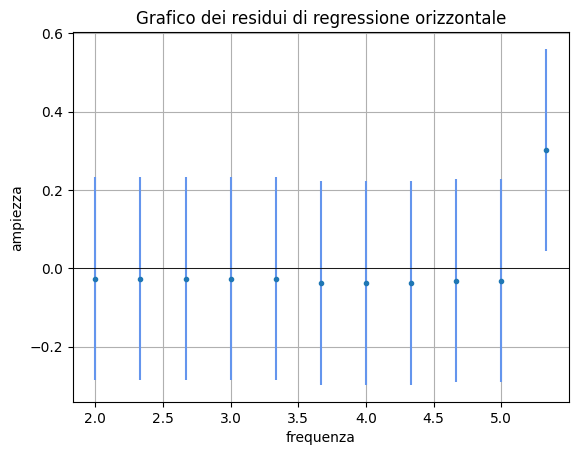

In [34]:
chi_quadro(A_1p, np.log10( frequenza_hz_1p ), err_A_1p, retta_orizzontale( np.log10( frequenza_hz_1p ) ,5.39774904 ), "ampiezza", "frequenza", "orizzontale", False)

chi quadro 
 173.0057941998124
NDOF  
 2


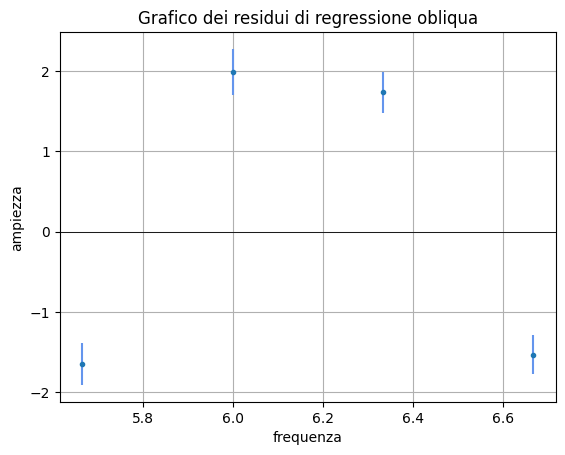

In [35]:
chi_quadro(A_2p, np.log10( frequenza_hz_2p ), err_A_2p, retta_fit_xba(np.log10( frequenza_hz_2p ), -22.82197534  , 136.27290367 ), "ampiezza", "frequenza", "obliqua", False)

In [36]:
%%shell
curl -l https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_2/simulazione/2%20-%20VTC > "2 - VTC"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32222  100 32222    0     0  94645      0 --:--:-- --:--:-- --:--:-- 94770


In [37]:
#@title dati simulazione

f_spice, a_spice, fase_spice = np.loadtxt( "2 - VTC", skiprows=1, unpack=True)

Grafico

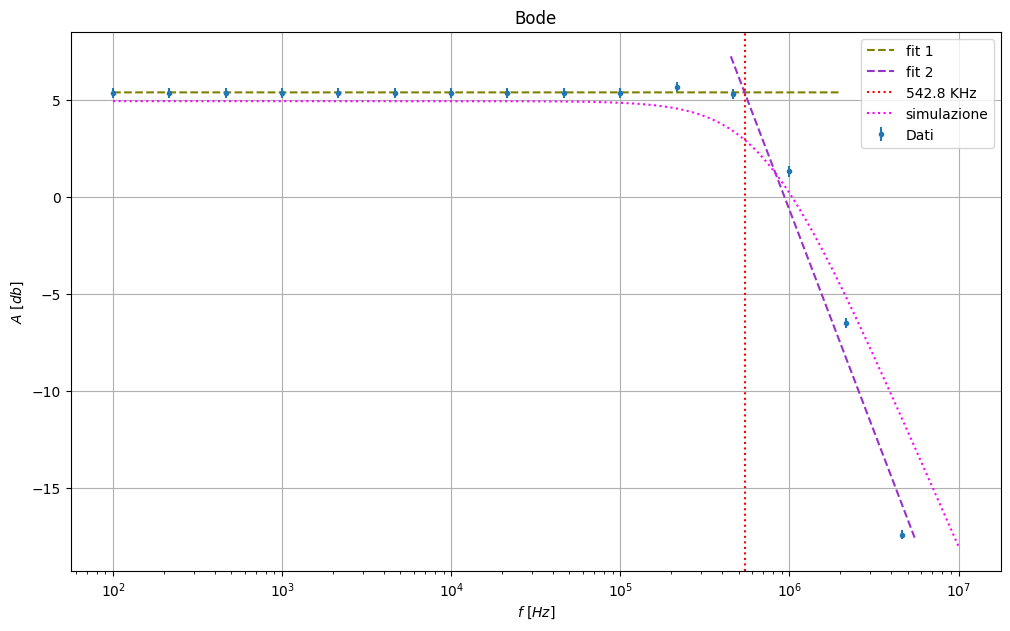

In [38]:
frequenza_hz = []
for i in frequenza:
  dummy = i*1000
  frequenza_hz.append(dummy)

plt.figure(figsize=(12,7))
plt.xscale("log", base=10)
plt.grid()
plt.title("Bode")
plt.xlabel("$f \\ [Hz]$")
plt.ylabel("$A \\ [db]$")
plt.errorbar(frequenza_hz, A, linestyle="", marker=".", yerr=err_A, label="Dati")
plt.plot( np.linspace(100, 2000000, 1000000), retta_orizzontale( np.linspace(100, 2000000, 1000000), 5.39774904 ), marker="", linestyle="--", color="olive", label="fit 1" ) #dritta x,a
plt.plot( ( np.linspace(450000, 5500000, 1000000) ), ( retta_fit_xba( np.log10( np.linspace(450000, 5500000, 1000000) ), -22.82197534  , 136.27290367 ) ), marker="", linestyle="--", color="darkorchid", label="fit 2" ) #obliqua
plt.axvline(x=542764.1652692795, color='red', linestyle=':', label="542.8 KHz")
plt.plot( f_spice, a_spice, marker="", linestyle=":", label="simulazione" , color="magenta")
plt.legend()

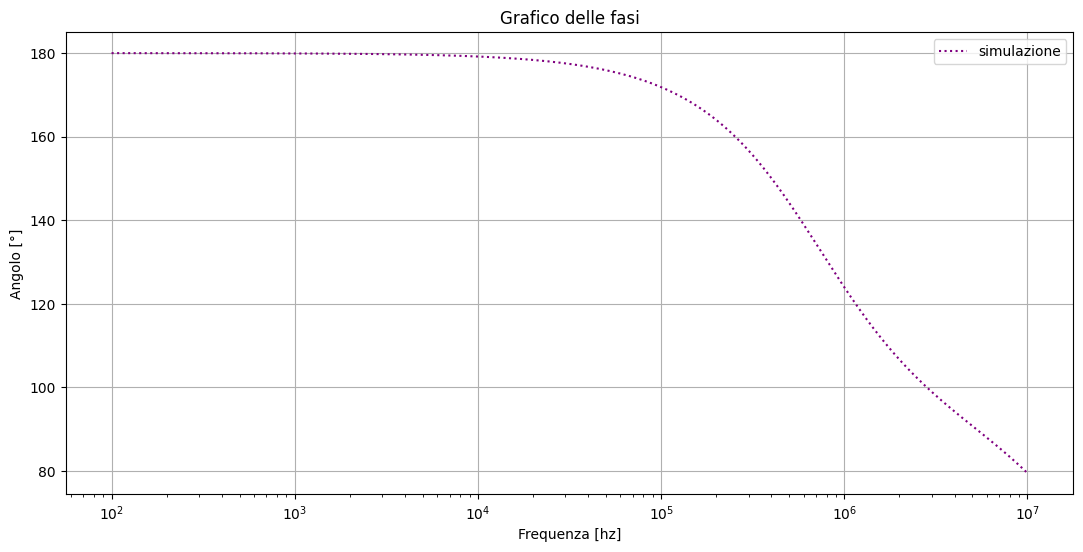

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(f_spice, fase_spice, marker="", linestyle=":", label="simulazione", color="purple")
plt.grid()
plt.xlabel("Frequenza [hz]")
plt.ylabel("Angolo [°]")
plt.title("Grafico delle fasi")
plt.xscale("log", base=10)
plt.legend()

#Librerie

In [2]:
def chi_quadro(y_vec, x_vec, sigma_vec, y_ref, stringa_ytitle, stringa_xtitle, stringa_titolo, bolean_parameter):

  import math
  import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
  y = list(y_vec)
  x = list(x_vec)
  sigma = list(sigma_vec)
  dimensione = len(y)

#calcolo del chi quadro
  vettore_scarti_quadratici = []
  vettore_scarti = []
  for i in range(dimensione):
    dummy_2 = 0
    dummy_3 = 0
    dummy_4 = 0
    dummy_2 = y[i] - y_ref[i]
    dummy_3 = dummy_2 / sigma[i]
    dummy_4 = dummy_3**2
    vettore_scarti_quadratici.append(dummy_4)
    vettore_scarti.append(dummy_2)

  chi_quadro = sum(vettore_scarti_quadratici)
  print("chi quadro \n", chi_quadro)
  print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
  ascisse = x

  plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
  if bolean_parameter == True:
    plt.xscale("log", base=10)
  plt.title("Grafico dei residui di regressione " + stringa_titolo )
  plt.ylabel(stringa_ytitle)
  plt.xlabel(stringa_xtitle)
  plt.axhline(0, color='black', linewidth="0.6")
  plt.grid()

In [3]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [4]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [5]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()

In [31]:
def intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2):
  import math

  x_intersezione = 0
  err_x_intersezione = 0

  #calcolo intersezione
  x_intersezione = (int2 - int1) / (pend1 - pend2)

  #calcolo errore
  dummy1 = 0
  dummy2 = 0
  dummy3 = 0
  dummy4 = 0
  dummy5 = 0
  dummy6 = 0

  dummy1 = ( err_pend1 / (pend1 - pend2) )**2
  dummy2 = ( err_pend2 / (pend1 - pend2) )**2
  dummy3 = ( err_int2 * ( (int2 - int1) / (pend1 - pend2)**2 ) )**2
  dummy4 = ( x_intersezione*err_pend1 )**2
  dummy5 = cov1*err_pend1*err_int1
  dummy6 = cov2*err_pend2*err_int2

  err_x_intersezione = math.sqrt( abs(dummy1 + dummy2 + dummy3 + dummy4 + dummy5 + dummy6) )

  #print dei risultati
  print("---------------------------------------------")
  print("x intersezione")
  print(x_intersezione)
  print("incertezza")
  print(err_x_intersezione)
  print("---------------------------------------------")